<a href="https://colab.research.google.com/github/RiniPaul86/Assignment/blob/main/Obesity_Classification_final_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction
In this assignment, we will employ Decision Tree algorithms to analyze a dataset focused on obesity classification. The objective is to build and evaluate predictive models that can accurately classify individuals into different obesity categories based on their attributes. By utilizing Decision Tree techniques, we aim to extract meaningful insights from the data and understand the decision-making process behind the classification.


###Steps:

Foundational Knowledge: Understand the decision tree principles and splitting criteria.

Data Exploration: Analyze the dataset's structure and characteristics.

Preprocessing and Feature Engineering: Handle missing values, encode categorical variables, and split the dataset.

Decision Tree Construction: Build the model with chosen hyperparameters and train it.

Model Evaluation: Assess the model using accuracy, precision, recall, and visualize the decision tree.

Hyperparameter Tuning and Optimization: Optimize model performance using techniques like GridSearchCV.

Through these steps, the assignment will provide a comprehensive understanding of Decision Tree algorithms and their application in predictive modeling and data analysis.



In [1]:
#importing impt liberaries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the datasets
ob = pd.read_csv("/content/Obesity Classification.csv")

In [3]:
ob.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
ob.ndim

2

In [5]:
ob.shape

(108, 7)

In [6]:
ob.size

756

In [7]:
ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [8]:
ob.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [9]:
ob.duplicated().sum()

0

In [10]:
#The ID column is not relevant for training the model, so we'll drop it.
ob = ob.drop(columns=['ID'])

In [11]:
# Encoding Gender and Label columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ob['Gender'] = label_encoder.fit_transform(ob['Gender'])  # Encode Gender
ob['Label'] = label_encoder.fit_transform(ob['Label'])    # Encode Label (Target variable)

#Visualizations and insights

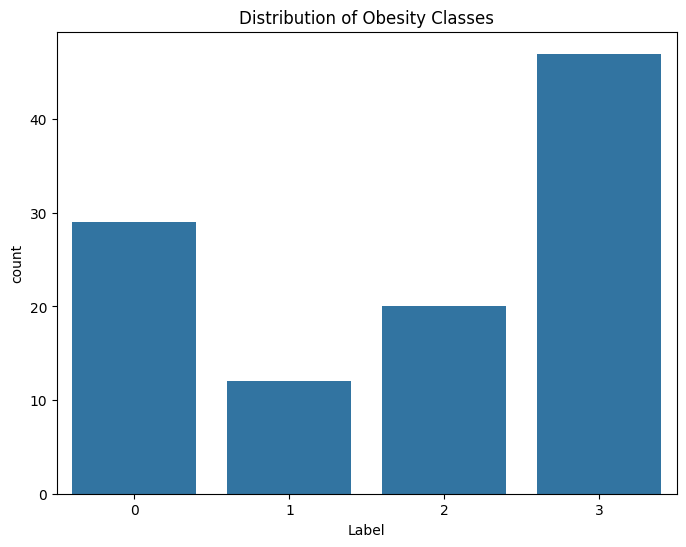

In [31]:
#Understand how the obesity classes are distributed in the dataset.

# Plot the distribution of the target variable (Label)
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=ob)
plt.title('Distribution of Obesity Classes')
plt.show()

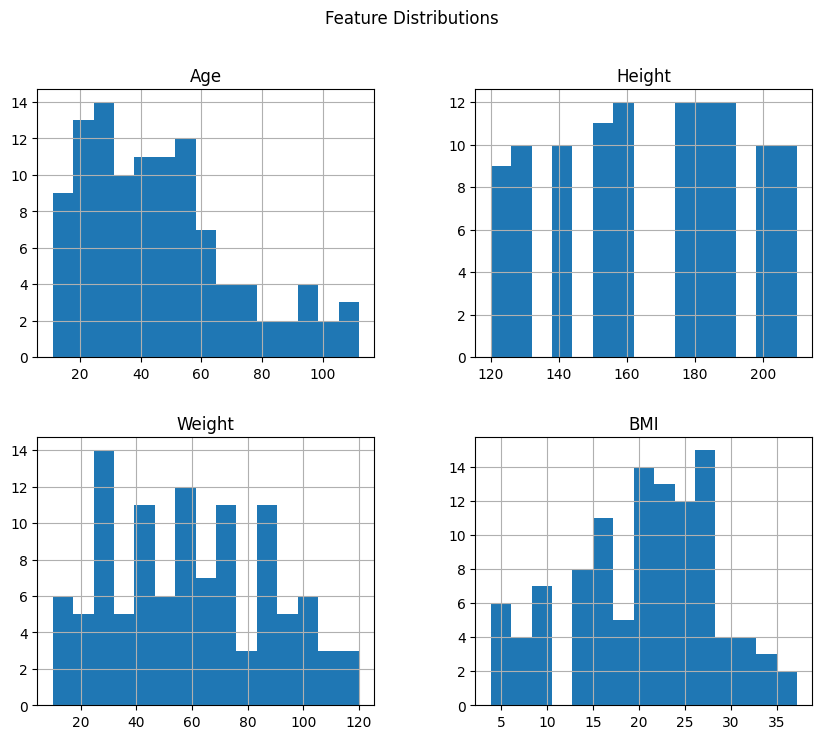

In [32]:
#Plotting histograms plots for each feature to explore their distributions.

# Plot distributions of numerical features
numerical_features = ['Age', 'Height', 'Weight', 'BMI']
ob[numerical_features].hist(figsize=(10, 8), bins=15)
plt.suptitle('Feature Distributions')
plt.show()

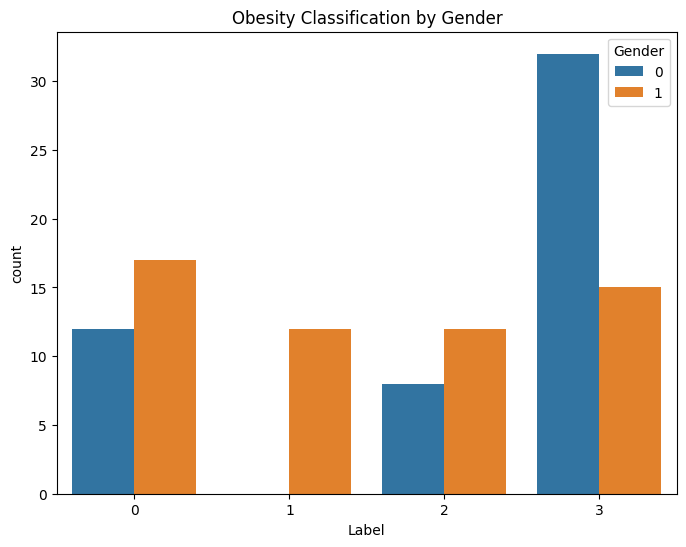

In [36]:
#Understanding how gender influences the obesity classification.

# Bar plot of obesity class based on gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', hue='Gender', data=ob)
plt.title('Obesity Classification by Gender')
plt.show()

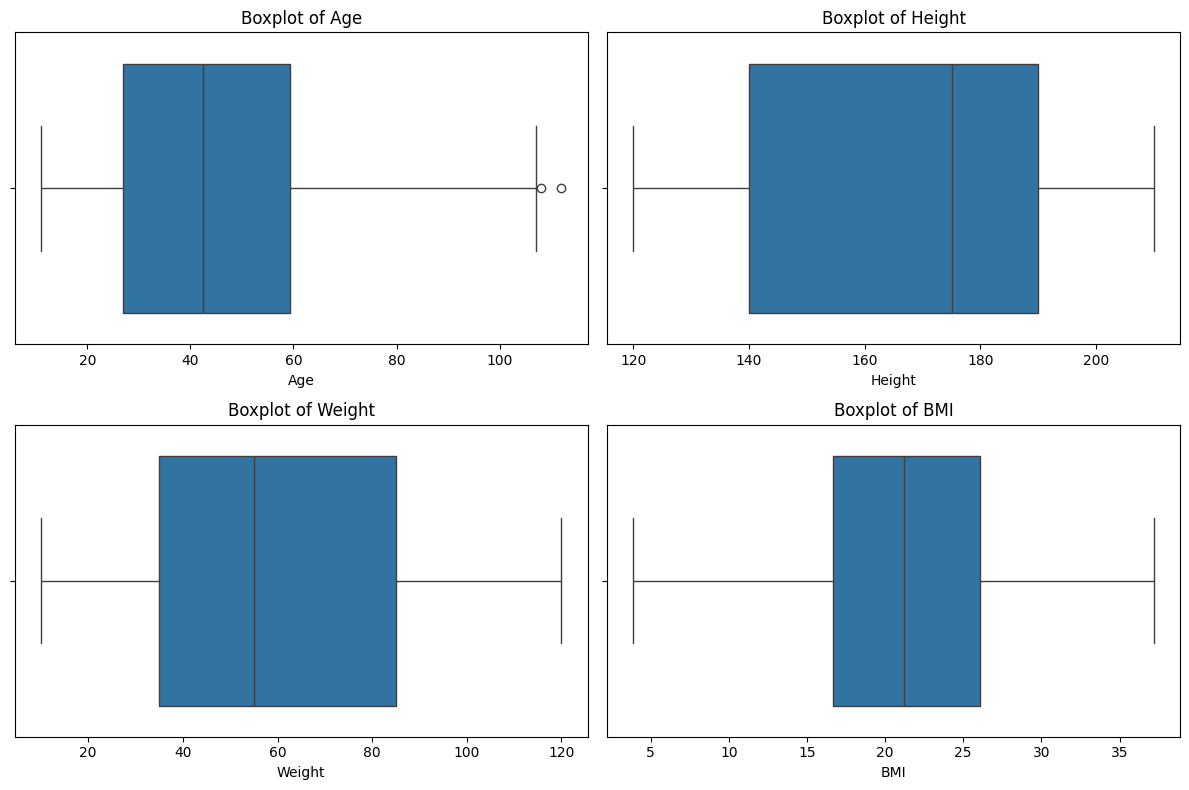

In [33]:
# box plots to detect outliers in the data.

# Box plots for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=ob[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

The Age distribution shows some outliers in older ages, while the other variables (Height, Weight, BMI) do not have extreme values.

Height and Weight show a wider range, while BMI is more concentrated between 15 and 35, which is expected for a dataset related to obesity classification.


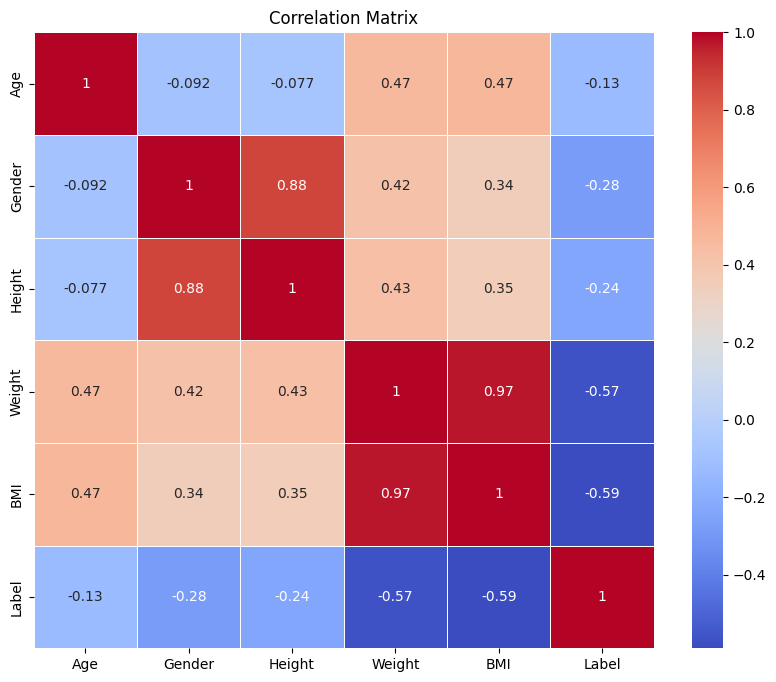

In [34]:
#Checking  correlations between numerical features using a heatmap to identify any strong relationships

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = ob.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

BMI and Weight have the strongest correlation for obesity classification

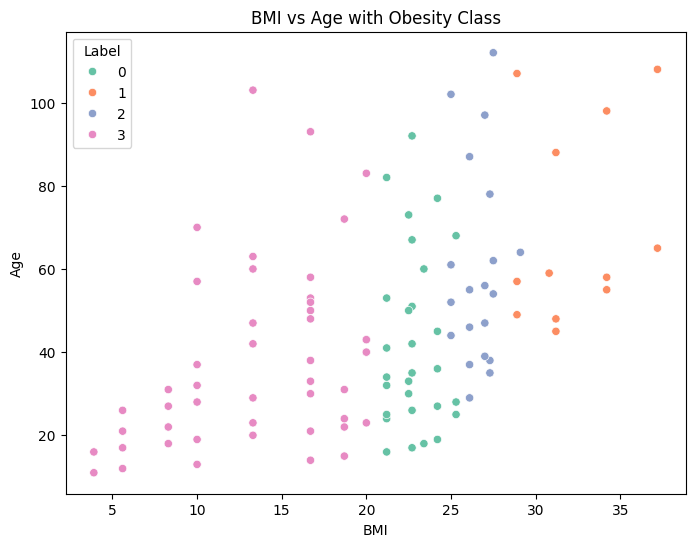

In [37]:
# relationship between BMI and obesity classification

# Scatter plot of BMI vs Obesity Class
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Age', hue='Label', data=ob, palette='Set2')
plt.title('BMI vs Age with Obesity Class')
plt.show()

There is a clear relationship between BMI and age across obesity classes. Older participants are more likely to have higher BMIs, while younger individuals tend to have lower or more varied BMIs.

The distribution of classes aligns well with expected BMI categories, with distinct separations between underweight, normal weight, overweight, and obese participants based on BMI values.

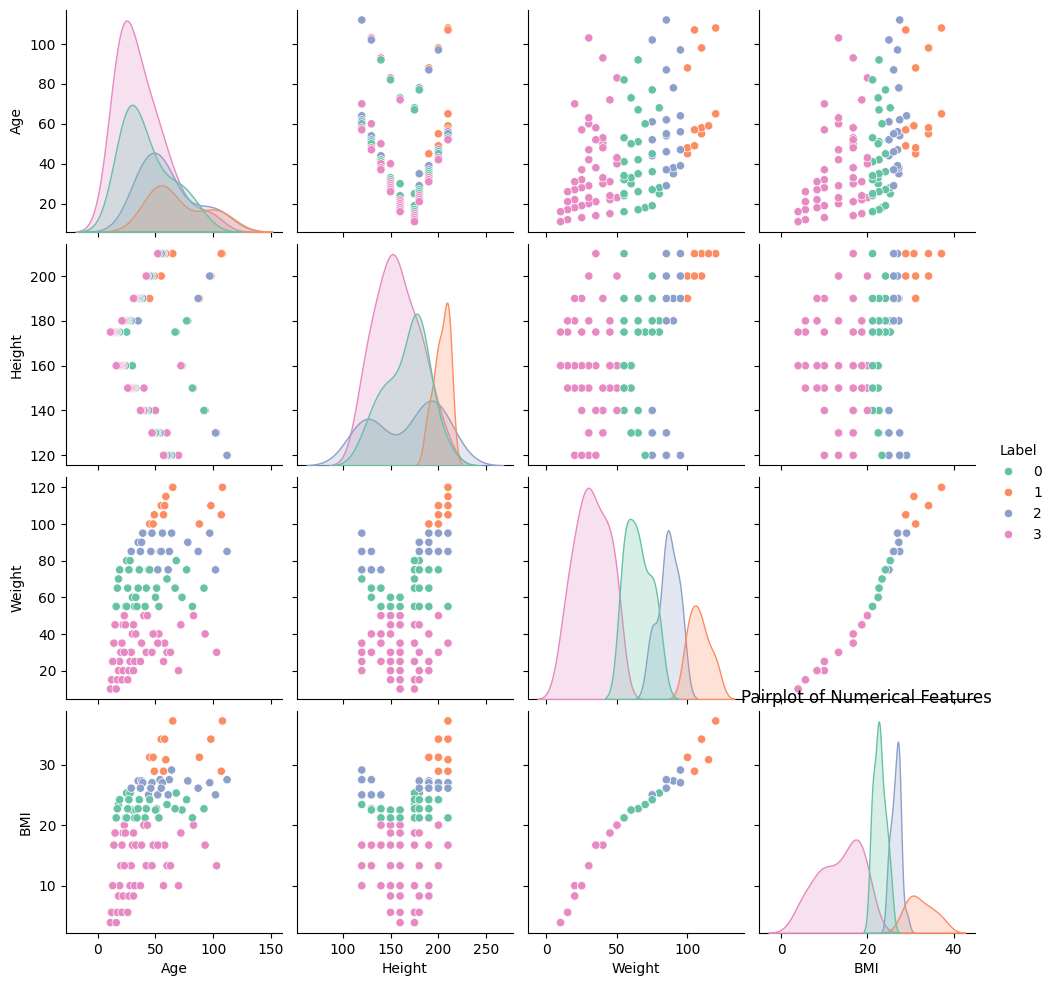

In [38]:
#visualize relationships between features in combination with the class label.

# Pairplot of numerical features
sns.pairplot(ob, hue='Label', vars=numerical_features, palette='Set2')
plt.title('Pairplot of Numerical Features')
plt.show()


BMI and Weight are the strongest predictors for obesity classification, showing clear separations between the classes.

Height and Age provide some additional information but are not as distinct in separating the obesity classes.

These patterns suggest that focusing on BMI and weight as primary features will likely lead to more accurate model predictio

#ML model for Dcision Tree

In [12]:
#Split the data into training and testing sets.

X = ob.drop(columns=['Label'])  # Features: Age, Gender, Height, Weight, BMI
y = ob['Label']  # Target: Label (Obesity classification)

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Train the model on the scaled data
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

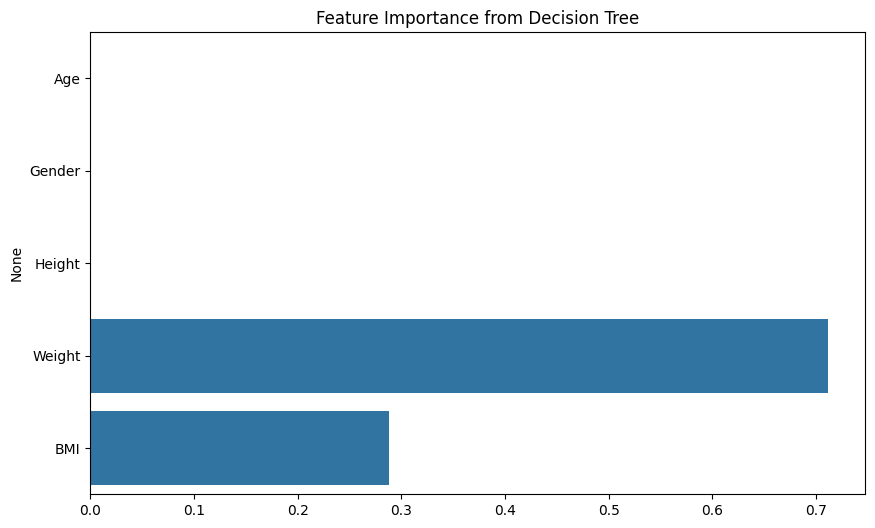

In [39]:
# Feature importance from the decision tree model
importances = best_clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance from Decision Tree')
plt.show()

In [15]:
# Predict on the scaled test set
y_pred = clf.predict(X_test_scaled)

In [16]:
#We'll use metrics like accuracy, precision, recall, and the confusion matrix to evaluate the model.

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

Confusion Matrix:
[[ 6  0  0  0]
 [ 0  5  0  0]
 [ 0  0  9  0]
 [ 0  0  0 13]]


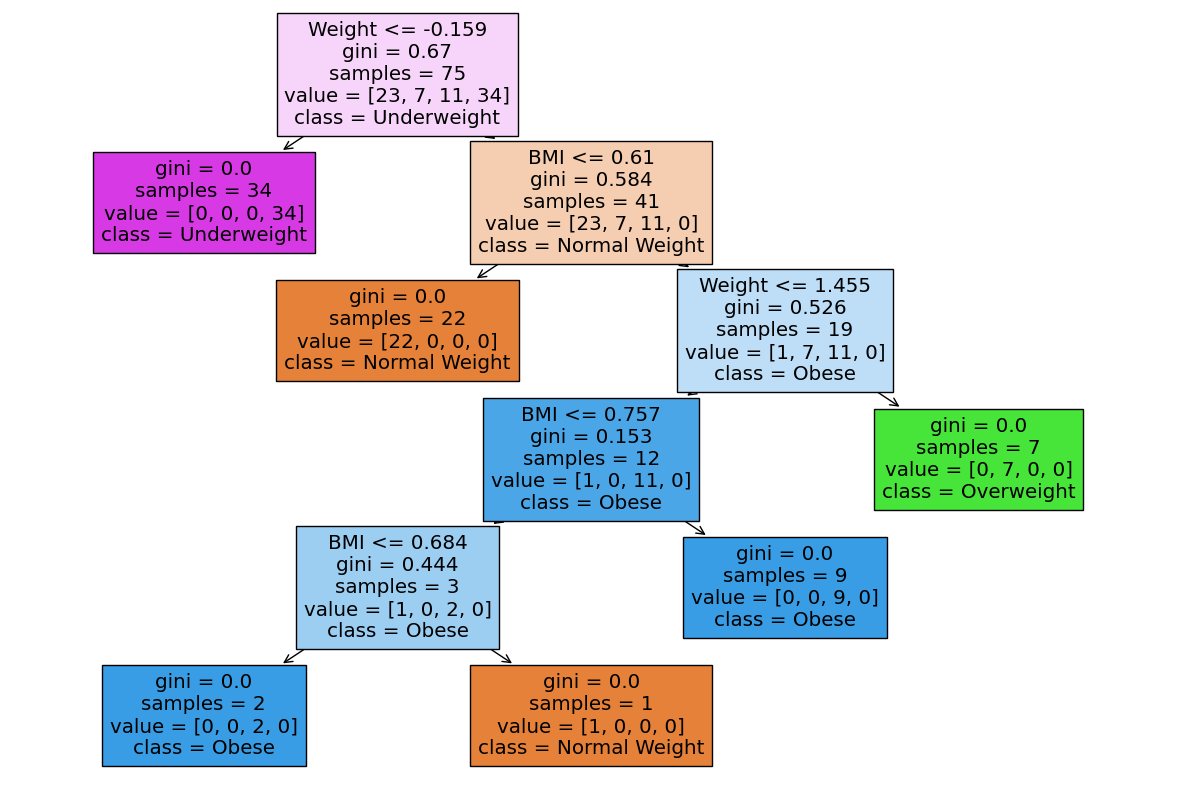

In [17]:
#To better understand the decision-making process of the model, you can visualize the decision tree.

# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Normal Weight', 'Overweight', 'Obese', 'Underweight'], filled=True)
plt.show()

In [18]:
#To optimize the model, you can perform hyperparameter tuning using GridSearchCV.

from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'criterion': ['gini', 'entropy']}

# Perform GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from the grid search
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [19]:
# Re-train the model using the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [22]:
# Predictions with the optimized model
y_pred_optimized = best_clf.predict(X_test_scaled)

In [23]:
# Evaluate the optimized model
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f'Optimized Accuracy: {optimized_accuracy}')

Optimized Accuracy: 0.9393939393939394


In [24]:
#Before Optimization:

#The model achieved 100% accuracy, with perfect precision, recall, and F1-scores for all classes.
#The confusion matrix showed no misclassifications.
#However, such high accuracy suggests overfitting, where the model likely memorized the training data rather than generalizing well.

#After Optimization:

#After applying GridSearchCV, the models accuracy dropped slightly to 93.94%.
#The optimized model is less complex, with a max depth of 3, improving its generalizability.
#The slight drop in accuracy indicates the model now avoids overfitting and can better handle unseen data, making it more robust.
#This shows a trade-off between complexity and accuracy, with better overall performance after tuning.

In [25]:
# Get the optimized model
optimized_model = grid_search.best_estimator_

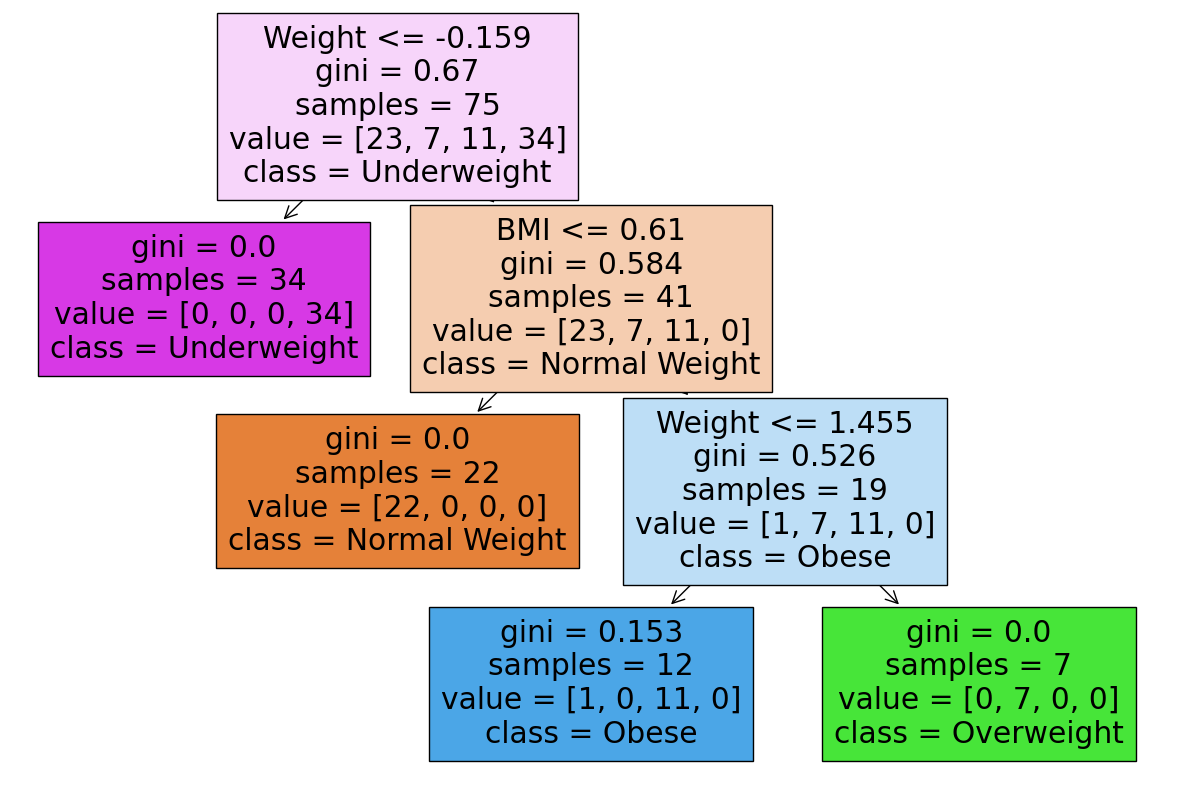

In [26]:
# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(best_clf, feature_names=X.columns, class_names=['Normal Weight', 'Overweight', 'Obese', 'Underweight'], filled=True)
plt.show()

#Testing the optimized model with a new datapoint

In [27]:


# new data point (Age, Gender, Height, Weight, BMI)

new_data = pd.DataFrame({
    'Age': [25],
    'Gender': [0],  # Assuming '0' is encoded for Male and '1' for Female
    'Height': [170],  # Height in cm
    'Weight': [40],   # Weight in kg
    'BMI': [13.8]    # Calculate BMI based on the formula
})

# Scale the new data using the same scaler used during training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

# Make the prediction
prediction = optimized_model.predict(new_data_scaled)

# Output the result
print("Predicted Obesity Classification:", prediction[0])


Predicted Obesity Classification: 0


In [28]:
# Define the mapping of numeric values to obesity class labels
label_mapping = {
    0: "Underweight",
    1: "Normal Weight",
    2: "Overweight",
    3: "Obese"
}

In [29]:
# Get the numeric prediction from the model
prediction = optimized_model.predict(new_data_scaled)

# Map the numeric prediction to the corresponding label
predicted_label = label_mapping[prediction[0]]

# Output the result
print("Predicted Obesity Classification:", predicted_label)

Predicted Obesity Classification: Underweight


In [30]:
#The decision tree model predicts the obesity classification based on the input features.